<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Project 2: Customer Personality Analysis 

### Using Data to Know Your Customers Better

Knowing who your customers are and what drives them to buy your product are key to business growth and success.

Through customer analysis, companies can identify different groups of customers and the needs of those customers to help them build more personalized customer experiences. Companies can tweak their products or make adjustments accordingly to their products to better suit the customer in order to stand out in a competitive marketplace.

### What is Customer Analysis? 
Customer analysis is the process of analyzing customer data to extract insights and inform business decisions.

- Targeted Customers: The company can target its product that is specific to the customer's needs. Analysing the trends of their lifestyles would make the company target its potential buyers and make it cost-efficient as the company's Marketing cost would cut down effectively.


- Retain & Provide value to the customers: Analysing the financial and social needs and backgrounds of the customers and providing them the products that they need would make the customers stay loyal to the company and retain the existing customers. This better customer service would make new potential custmers get into the company and the generation of Revenue would then be increased.

### Problem Statement: Project goal

Predict if the customer will get the product.
- predict ['Response']

Use different machine learning models to understand data
- K-means
- Logistic Regression 
- Decision Tree
- Random Forest
- Naive Bayes
- Support Vector Machine (Kernel: rbf)

### Data Source

Data Collected from Kaggle: [Customer Personality Analysis](https://www.kaggle.com/imakash3011/customer-personality-analysis)

### Features 

Data Dictionary: [Variables](https://docs.google.com/document/d/1yU7UBLHLOIMQf6TL5pcPhAzq8LW8KEZqhf4fCFR8R94/edit#)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy import stats

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

from sklearn import metrics, svm, datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Graphs and charts 
!pip install plotly==5.5.0
import plotly.graph_objects as go
import plotly.express as px

Populating the interactive namespace from numpy and matplotlib


## I. Taking a glance at the data

In [2]:
#Reading the file
#First 5 rows of data
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
#The dataset comprised of 29 variables (columns) and 2240 observations (rows)

print("Number of rows:", len(data))
print("Number of columns:", data.shape[1])
data.shape

Number of rows: 2240
Number of columns: 29


(2240, 29)

In [4]:
#Data has 29 Features 
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Based on data.info()

### a. Customer Infomation 

- Use 'Year_Birth' feature to create new feature: ['Age'] to find the age of the customer. 
- We need to encode Education and Marital_Status column in the data frame since it has categorical features.
- The Income column has 24 missing values, I will drop these columns because this only forms 1% of total data. 
- Sum 'Kidhome' + 'Teenhome' to create new feature: ['Total_Child'] of a family.
- The Dt_Customer column (date of customer's enrollment with the company) was parsed as Object.
- Use 'Dt_Customer' to create new feature: ['Years_Enroll_with_Company'] to know how long has a customer stayed with company. 

### b. Amount spent on each category

Following features tells us how much a customer spent on each products in the last 2 years. 

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Sum 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts' and 'MntGoldProds' to create new feature: ['Total_Spending'] to find how much a customer spend in total on all products. 

Sum 'NumWebPurchases','NumCatalogPurchases' and 'NumStorePurchases' to create new feature: ['Total_no_of_purchases']
 

In [6]:
#Extracting ALL the uniq_data for each Variables 
#We will be focus looking at "Response" column. 

for uniq_data in data:
    print(uniq_data)
    values, counts = np.unique(data[uniq_data], return_counts=True)
    print(values)
    print(counts)
    
for uniq_data in data.columns:
    print(uniq_data)
    data[uniq_data].unique()
    print(np.sort(data[uniq_data].unique()))

ID
[    0     1     9 ... 11187 11188 11191]
[1 1 1 ... 1 1 1]
Year_Birth
[1893 1899 1900 1940 1941 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996]
[ 1  1  1  1  1  7  7  8 16 16 21 30 29 43 52 35 50 49 55 43 53 51 49 36
 44 45 42 74 50 44 51 71 77 87 79 74 69 83 89 52 77 53 39 39 45 42 38 32
 42 27 29 30 18 15 13  5  3  5  2]
Education
['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']
[ 203   54 1127  370  486]
Marital_Status
['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']
[  2   3 232 864 480 580  77   2]
Income
[1730. 2447. 3502. ...   nan   nan   nan]
[1 1 1 ... 1 1 1]
Kidhome
[0 1 2]
[1293  899   48]
Teenhome
[0 1 2]
[1158 1030   52]
Dt_Customer
['01-01-2013' '01-01-2014' '01-02-2013' '01-02-2014' '01-03-2013'
 '01-03-2014' '01-04-2

## II. Clean the Data

### a. Encode 'Education' Column

In [7]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [9]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [10]:
#Replace education data for better understanding
data['Education']=data['Education'].str.replace('Basic','Below_University')
data['Education']=data['Education'].str.replace('Graduation','University')
data['Education']=data['Education'].str.replace('2n Cycle','2ndCycle_Master')

In [11]:
data.Education.unique()

array(['University', 'PhD', 'Master', 'Below_University',
       '2ndCycle_Master'], dtype=object)

In [12]:
#Encode Education data
data['Education'].\
replace({'Below_University' : 1, 'University' : 2, 'Master' : 3, '2ndCycle_Master' : 4, 'PhD' : 5},
        inplace=True)

In [13]:
data['Education'].value_counts()

2    1127
5     486
3     370
4     203
1      54
Name: Education, dtype: int64

In [14]:
#More than 97% Customer has at least university degree or above.
fig = go.Figure(data=[go.Pie(labels=data['Education'].value_counts().index, values=data['Education'].value_counts().values)])
fig.update_layout(height=400, width=500, title_text="Pie chart showing Education")
fig.show()

### b. Encode 'Marital_Status' Column

In [15]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [16]:
#Replace marital status data because 'alone','yolo' & 'absurd' has low frequency and can be grouped under 'Single' as well.
##We will keep "Together" and "Married" as different groups couse this actually can be recognized as different life-experience which can influence client habits and other parameters a lot.
data['Marital_Status']=data['Marital_Status'].str.replace('Alone','Single')
data['Marital_Status']=data['Marital_Status'].str.replace('Absurd','Single')
data['Marital_Status']=data['Marital_Status'].str.replace('YOLO','Single')

In [17]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [18]:
#Encode Marital_Status data
data['Marital_Status'].\
replace({'Single' : 1, 'Together' : 2, 'Married' : 3, 'Divorced' : 4, 'Widow' : 5},
       inplace=True)

In [19]:
data['Marital_Status'].value_counts()

3    864
2    580
1    487
4    232
5     77
Name: Marital_Status, dtype: int64

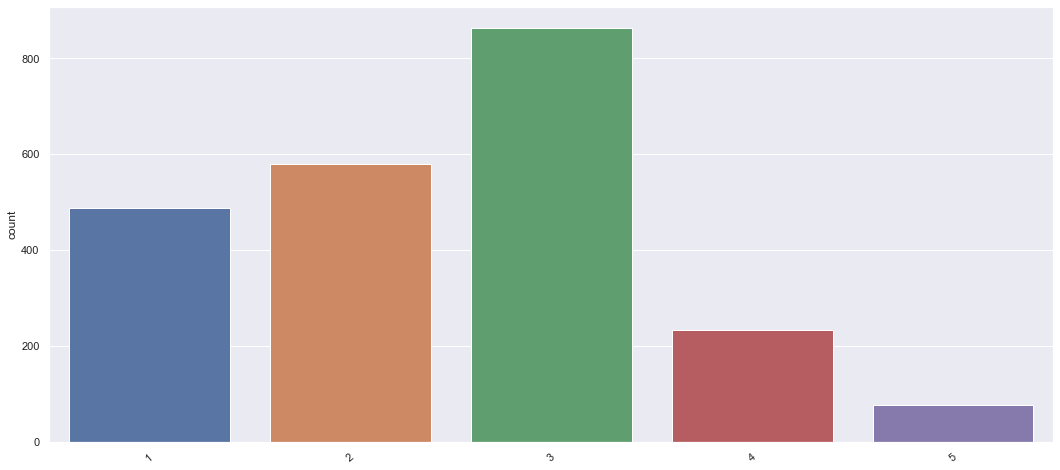

In [20]:
plt.figure(figsize=(18,8))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = data['Marital_Status'].to_numpy())
plt.xticks(rotation=40)
plt.show()

### c. Parsing OBJECT as DATETIME

In [21]:
print(data["Dt_Customer"].head())

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object


In [22]:
#Parsing OBJECT as DATETIME
print("Data type of Dt_Customer column before parsing : ", data["Dt_Customer"].dtypes)
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
print("Data type of Dt_Customer column after parsing : ", data["Dt_Customer"].dtypes)
print(data["Dt_Customer"].head())

Data type of Dt_Customer column before parsing :  object
Data type of Dt_Customer column after parsing :  datetime64[ns]
0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


### d. Income

In [23]:
data['Income'].shape

(2240,)

In [24]:
#24 null values in 'Income' column, is like 1% of all dataset, small impact if they were removed. 
data['Income'].isna().sum()

24

In [25]:
#Max income is $666666?
data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [26]:
#Info of the customer who's income is $666666.00
#Education 2 :unlikely for a gratuate student earning $666666.00
data[data['Income']==666666.0]

ID  Year_Birth  Education  Marital_Status    Income  Kidhome  \
2233  9432        1977          2               2  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2233         0  2013-02-06       23         9  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2233             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2233         0              3         11         0  

[1 rows x 29 columns]

In [27]:
#We see that $666666.00 is clearly an Outlier, drop it
#we can also see several values exceeding 150k, these values look logically normal and stay away from median just for several sigmas. So we can keep them.
px.box(data[['Income']], y='Income', points='all', title='Income distribution across dataset')

In [28]:
#Income that is more than 165000
data[data['Income']>=165000]

ID  Year_Birth  Education  Marital_Status    Income  Kidhome  \
2233  9432        1977          2               2  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2233         0  2013-02-06       23         9  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2233             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2233         0              3         11         0  

[1 rows x 29 columns]

#### d.1 Drop the NULL Value and the Outlier

In [29]:
data = data.dropna()
print("The shape of the dataset after removing null values is : ", data.shape)

The shape of the dataset after removing null values is :  (2216, 29)


In [30]:
#Drop Income that is higher than 165000
data = data[data.Income <= 165000]
px.box(data[['Income']], y='Income', points='all', title='Age distribution across dataset')

### e. Examine Purchases data

#### e.1 NumWebPurchases

In [31]:
data.NumWebPurchases.describe()

count    2215.000000
mean        4.085779
std         2.741473
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

In [32]:
data.NumWebPurchases.value_counts()

2     368
1     348
3     333
4     277
5     219
6     201
7     154
8     102
9      75
0      48
11     44
10     43
23      1
25      1
27      1
Name: NumWebPurchases, dtype: int64

In [33]:
px.box(data[['NumWebPurchases']], y='NumWebPurchases', points='all', title='Num Web Purchases distribution')

#### e.2  NumCatalogPurchases 

In [34]:
data.NumCatalogPurchases.describe()

count    2215.000000
mean        2.671783
std         2.927179
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

In [35]:
data.NumCatalogPurchases.value_counts()

0     576
1     491
2     274
3     182
4     181
5     137
6     128
7      79
8      55
10     47
9      42
11     19
28      3
22      1
Name: NumCatalogPurchases, dtype: int64

In [36]:
px.box(data[['NumCatalogPurchases']], y='NumCatalogPurchases', points='all', title='Num Catalog Purchases distribution')

#### e.3  NumStorePurchases

In [37]:
data.NumStorePurchases.describe()

count    2215.000000
mean        5.802257
std         3.250974
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

In [38]:
data.NumStorePurchases.value_counts()

3     483
4     319
2     220
5     211
6     177
8     147
7     141
10    124
9     106
12    104
13     83
11     80
0      14
1       6
Name: NumStorePurchases, dtype: int64

In [39]:
px.box(data[['NumStorePurchases']], y='NumStorePurchases', points='all', title='Num Store Purchases distribution')

### f. Examine complain data

In [40]:
data['Complain'].value_counts()

0    2194
1      21
Name: Complain, dtype: int64

In [41]:
fig = go.Figure(data=[go.Pie(labels=data['Complain'].value_counts().index, values=data['Complain'].value_counts().values)])
fig.update_layout(height=400, width=500, title_text="Number of Complaint by Cst")
fig.show()

### g. Examine response data

In [42]:
data['Response'].value_counts()

0    1882
1     333
Name: Response, dtype: int64

In [43]:
#85% of customer has no response (reject) the campaign, while 15% customer accepted the campaign 
fig = go.Figure(data=[go.Pie(labels=data['Response'].value_counts().index, values=data['Response'].value_counts().values)])
fig.update_layout(height=400, width=500, title_text="Response by Cst")
fig.show()

## III. Creating New Features

### a. Age of the customer

In [44]:
data['Age'] = 2021 - data['Year_Birth']
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

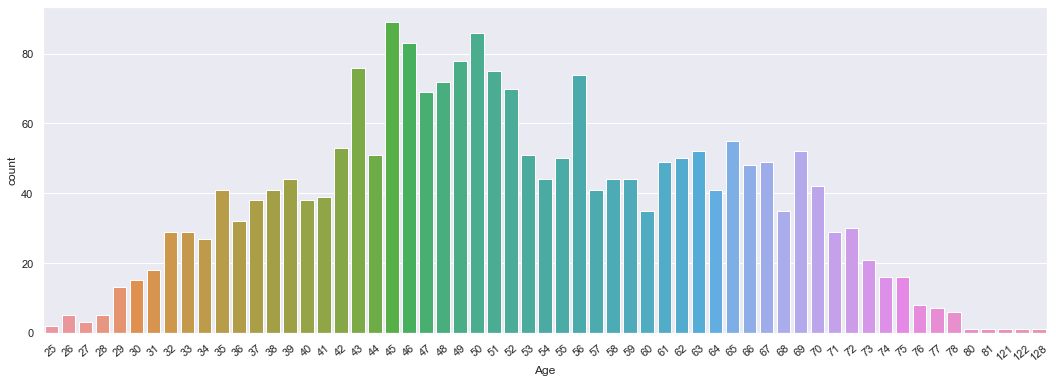

In [45]:
#Most of our customers are in range of 40-57
#Some customers with age 121, 122,128 I will drop them (outlier).
plt.figure(figsize=(18,6))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'Age', data = data)
plt.xticks(rotation=40)
plt.show()

In [46]:
#all these 3 customer has 0 as their reponse
data[data['Age']>100]

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900          4               4  36640.0        1         0   
239  11004        1893          4               1  60182.0        0         1   
339   1150        1899          5               2  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
192  2013-09-26       99        15  ...             0             0   
239  2014-05-17       23         8  ...             0             0   
339  2013-09-26       36       755  ...             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
192             0             0             0         1              3   
239             0             0             0         0              3   
339             1             0             0         0              3   

     Z_Revenue  Response  Age  
192         11         0  121  
239         11         0  128  
339         11         0  122  

[3 rows x 30 columns]

In [47]:
#all these 3 customer has 0 as their reponse
data.query('Age >= 100')['Response'].value_counts()

0    3
Name: Response, dtype: int64

In [48]:
AgeOutlier = data[(data['Age'] >= 100)].index
data.drop(AgeOutlier, inplace=True)
data['Age'].describe()

count    2212.000000
mean       52.086347
std        11.701599
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max        81.000000
Name: Age, dtype: float64

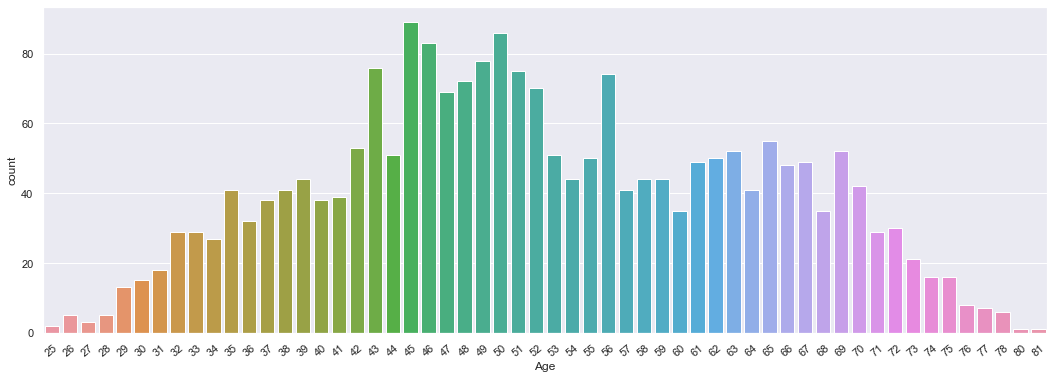

In [49]:
#Most of our customers are in range of 40-57
#Some customers with age 121, 122,128 I will drop them (outlier).
plt.figure(figsize=(18,6))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'Age', data = data)
plt.xticks(rotation=40)
plt.show()

### b. Total number of child from a family 

In [50]:
#total number of child, and drop Kidhome & Teenhome
data['Total_child'] = data['Kidhome'] + data['Teenhome']

In [51]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_child'],
      dtype='object')

### c. Total number of years a customer enrolled with the company 

In [52]:
data['Years_Enroll_with_Company']= 2021- pd.to_datetime(data['Dt_Customer']).dt.year
data['Years_Enroll_with_Company']
data['Years_Enroll_with_Company'].value_counts()

8    1170
7     552
9     490
Name: Years_Enroll_with_Company, dtype: int64

In [53]:
data.Years_Enroll_with_Company.describe()

count    2212.000000
mean        7.971971
std         0.685926
min         7.000000
25%         8.000000
50%         8.000000
75%         8.000000
max         9.000000
Name: Years_Enroll_with_Company, dtype: float64

### d. Total spending on ALL products for a customer

In [54]:
data['Total_Spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.Years_Enroll_with_Company.describe()

count    2212.000000
mean        7.971971
std         0.685926
min         7.000000
25%         8.000000
50%         8.000000
75%         8.000000
max         9.000000
Name: Years_Enroll_with_Company, dtype: float64

In [55]:
px.box(data[['Total_Spending']], y='Total_Spending', points='all', title='Total_Spending distribution')

### e. Total number of Purchases by a customer
- Total number of purchases = NumWebPurchases + NumCatalogPurchases + NumStorePurchases
- NumDealsPurchases should come from the other three parts.

In [56]:
data['Total_no_of_purchases']= data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data['Total_no_of_purchases']
data.Total_no_of_purchases.describe()

count    2212.000000
mean       12.566908
std         7.205427
min         0.000000
25%         6.000000
50%        12.000000
75%        18.250000
max        32.000000
Name: Total_no_of_purchases, dtype: float64

## IV. Drop Columns 

In [57]:
data.dtypes

ID                                    int64
Year_Birth                            int64
Education                             int64
Marital_Status                        int64
Income                              float64
Kidhome                               int64
Teenhome                              int64
Dt_Customer                  datetime64[ns]
Recency                               int64
MntWines                              int64
MntFruits                             int64
MntMeatProducts                       int64
MntFishProducts                       int64
MntSweetProducts                      int64
MntGoldProds                          int64
NumDealsPurchases                     int64
NumWebPurchases                       int64
NumCatalogPurchases                   int64
NumStorePurchases                     int64
NumWebVisitsMonth                     int64
AcceptedCmp3                          int64
AcceptedCmp4                          int64
AcceptedCmp5                    

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         2212 non-null   int64         
 1   Year_Birth                 2212 non-null   int64         
 2   Education                  2212 non-null   int64         
 3   Marital_Status             2212 non-null   int64         
 4   Income                     2212 non-null   float64       
 5   Kidhome                    2212 non-null   int64         
 6   Teenhome                   2212 non-null   int64         
 7   Dt_Customer                2212 non-null   datetime64[ns]
 8   Recency                    2212 non-null   int64         
 9   MntWines                   2212 non-null   int64         
 10  MntFruits                  2212 non-null   int64         
 11  MntMeatProducts            2212 non-null   int64         
 12  MntFis

Drop the following features because: 
- 'ID': unique identifier
- 'Year_Birth': [Age] column derived from this feature
- 'Kidhome'&'Teenhome' : [Total_child] new feature created, to know total number of child from a family. 
- 'Dt_Customer' = [Years_Enroll_with_Company], new feature created
- 'Z_CostContact' & 'Z_Revenue' have same value in all data points. So these two columns are not relevant and can be dropped.

In [59]:
data1 = data.drop(columns=['ID','Year_Birth','Kidhome','Teenhome','Dt_Customer','Z_CostContact','Z_Revenue'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  2212 non-null   int64  
 1   Marital_Status             2212 non-null   int64  
 2   Income                     2212 non-null   float64
 3   Recency                    2212 non-null   int64  
 4   MntWines                   2212 non-null   int64  
 5   MntFruits                  2212 non-null   int64  
 6   MntMeatProducts            2212 non-null   int64  
 7   MntFishProducts            2212 non-null   int64  
 8   MntSweetProducts           2212 non-null   int64  
 9   MntGoldProds               2212 non-null   int64  
 10  NumDealsPurchases          2212 non-null   int64  
 11  NumWebPurchases            2212 non-null   int64  
 12  NumCatalogPurchases        2212 non-null   int64  
 13  NumStorePurchases          2212 non-null   int64

In [60]:
data1.shape

(2212, 27)

In [61]:
data1.describe().T

count          mean           std     min  \
Education                  2212.0      2.970615      1.248625     1.0   
Marital_Status             2212.0      2.483725      1.047150     1.0   
Income                     2212.0  51958.810579  21527.278844  1730.0   
Recency                    2212.0     49.019439     28.943121     0.0   
MntWines                   2212.0    305.287523    337.322940     0.0   
MntFruits                  2212.0     26.329566     39.744052     0.0   
MntMeatProducts            2212.0    167.029837    224.254493     0.0   
MntFishProducts            2212.0     37.648734     54.772033     0.0   
MntSweetProducts           2212.0     27.046564     41.090991     0.0   
MntGoldProds               2212.0     43.925859     51.706981     0.0   
NumDealsPurchases          2212.0      2.324593      1.924507     0.0   
NumWebPurchases            2212.0      4.088156      2.742187     0.0   
NumCatalogPurchases        2212.0      2.672242      2.927542     0.0   
NumStorePurchases          2212.0      5.806510      3.250939     0.0   
NumWebVisitsMonth          2212.0      5.321429      2.425597     0.0   
AcceptedCmp3               2212.0      0.073689      0.261323     0.0   
AcceptedCmp4               2212.0      0.074141      0.262060     0.0   
AcceptedCmp5               2212.0      0.072785      0.259842     0.0   
AcceptedCmp1               2212.0      0.064195      0.245156     0.0   
AcceptedCmp2               2212.0      0.013562      0.115691     0.0   
Complain                   2212.0      0.009042      0.094678     0.0   
Response                   2212.0      0.150542      0.357683     0.0   
Age                        2212.0     52.086347     11.701599    25.0   
Total_child                2212.0      0.947559      0.749466     0.0   
Years_Enroll_with_Company  2212.0      7.971971      0.685926     7.0   
Total_Spending             2212.0    607.268083    602.513364     5.0   
Total_no_of_purchases      2212.0     12.566908      7.205427     0.0   

                               25%      50%       75%       max  
Education                      2.0      2.0      4.00       5.0  
Marital_Status                 2.0      3.0      3.00       5.0  
Income                     35233.5  51371.0  68487.00  162397.0  
Recency                       24.0     49.0     74.00      99.0  
MntWines                      24.0    175.5    505.00    1493.0  
MntFruits                      2.0      8.0     33.00     199.0  
MntMeatProducts               16.0     68.0    232.25    1725.0  
MntFishProducts                3.0     12.0     50.00     259.0  
MntSweetProducts               1.0      8.0     33.00     262.0  
MntGoldProds                   9.0     24.5     56.00     321.0  
NumDealsPurchases              1.0      2.0      3.00      15.0  
NumWebPurchases                2.0      4.0      6.00      27.0  
NumCatalogPurchases            0.0      2.0      4.00      28.0  
NumStorePurchases              3.0      5.0      8.00      13.0  
NumWebVisitsMonth              3.0      6.0      7.00      20.0  
AcceptedCmp3                   0.0      0.0      0.00       1.0  
AcceptedCmp4                   0.0      0.0      0.00       1.0  
AcceptedCmp5                   0.0      0.0      0.00       1.0  
AcceptedCmp1                   0.0      0.0      0.00       1.0  
AcceptedCmp2                   0.0      0.0      0.00       1.0  
Complain                       0.0      0.0      0.00       1.0  
Response                       0.0      0.0      0.00       1.0  
Age                           44.0     51.0     62.00      81.0  
Total_child                    0.0      1.0      1.00       3.0  
Years_Enroll_with_Company      8.0      8.0      8.00       9.0  
Total_Spending                69.0    397.0   1048.00    2525.0  
Total_no_of_purchases          6.0     12.0     18.25      32.0

## V. Compare between features 

After basic statistics, we will explore more insights.

In [62]:
data1.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_child',
       'Years_Enroll_with_Company', 'Total_Spending', 'Total_no_of_purchases'],
      dtype='object')

#### Create difference Age-groups

In [63]:
#How do people with different age expent differently?
#Creat diff Age Group
def age_buckets(x): 
    if x < 30: 
        return '18-29' 
    elif x < 40: return '30-39' 
    elif x < 50: return '40-49' 
    elif x < 60: return '50-59' 
    elif x < 70: return '60-69' 
    elif x >=70: return '70+' 
    else: return 'other'
    
data1['Age_groups'] = data1.Age.apply(age_buckets)
data1['Age_groups'].value_counts()

40-49    648
50-59    579
60-69    466
30-39    314
70+      177
18-29     28
Name: Age_groups, dtype: int64

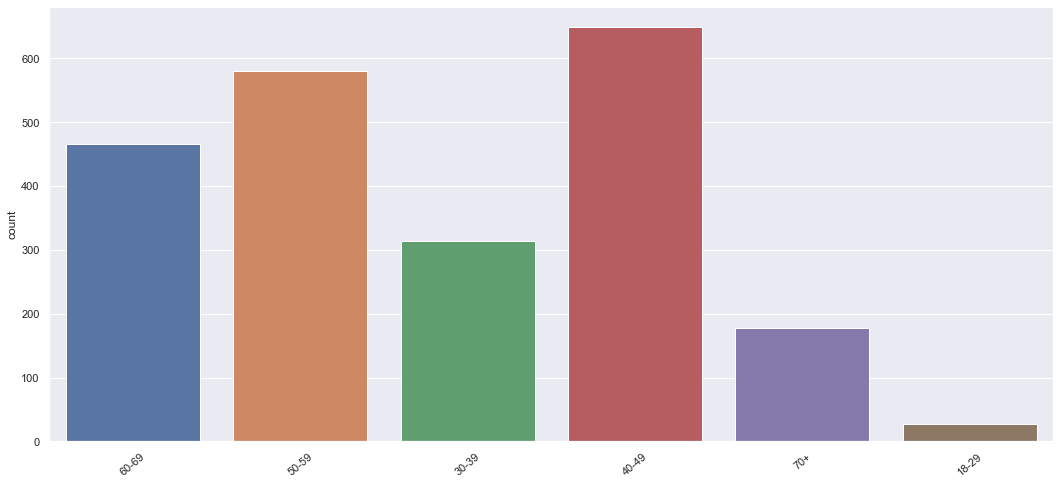

In [64]:
plt.figure(figsize=(18,8))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = data1['Age_groups'].to_numpy())
plt.xticks(rotation=40)
plt.show()

In [65]:
data1['Age_groups'].unique()

array(['60-69', '50-59', '30-39', '40-49', '70+', '18-29'], dtype=object)

In [66]:
#Encode Age_groups data
data1['Age_groups'].\
replace({'18-29' : 1, '30-39' : 2, '40-49' : 3, '50-59' : 4, '60-69' : 5, '70+' : 6},
       inplace=True)
data1['Age_groups'].unique()

array([5, 4, 2, 3, 6, 1])

#### Create difference Income-groups

In [67]:
data1['Income'].describe()

count      2212.000000
mean      51958.810579
std       21527.278844
min        1730.000000
25%       35233.500000
50%       51371.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

In [68]:
px.box(data1[['Income']], y='Income', points='all', title='Income distribution across dataset')

In [69]:
#How do people with different age expent differently?
#Creat diff Age Group
def income_buckets(x): 
    if x < 35000 : 
        return 'Low-Income' 
    elif x < 51000: return 'Lower-Middle-Income' 
    elif x < 68000: return 'Upper-Middle Income' 
    elif x < 113000: return 'High-Income' 
    elif x >=113000: return 'Extremly-High-Income' 
    else: return 'other'
    
data1['Income_groups'] = data1.Income.apply(income_buckets)
data1['Income_groups'].value_counts()

High-Income             559
Upper-Middle Income     553
Low-Income              549
Lower-Middle-Income     543
Extremly-High-Income      8
Name: Income_groups, dtype: int64

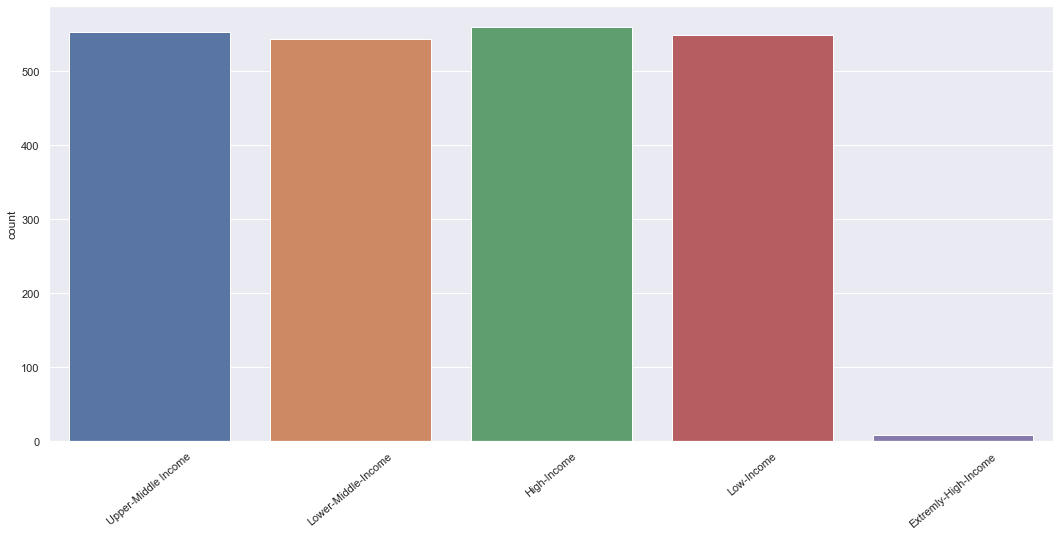

In [70]:
plt.figure(figsize=(18,8))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = data1['Income_groups'].to_numpy())
plt.xticks(rotation=40)
plt.show()

In [71]:
data1['Income_groups'].unique()

array(['Upper-Middle Income', 'Lower-Middle-Income', 'High-Income',
       'Low-Income', 'Extremly-High-Income'], dtype=object)

In [72]:
#Encode Age_groups data
data1['Income_groups'].\
replace({'Low-Income' : 1, 'Lower-Middle-Income' : 2, 'Upper-Middle Income' : 3, 'High-Income' : 4, 'Extremly-High-Income' : 5},
       inplace=True)
data1['Income_groups'].unique()

array([3, 2, 4, 1, 5])

In [73]:
data1.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_child',
       'Years_Enroll_with_Company', 'Total_Spending', 'Total_no_of_purchases',
       'Age_groups', 'Income_groups'],
      dtype='object')

### a. Income (Groups) & Education 

In [74]:
data1[['Income','Education']].corr(method='pearson')

Income  Education
Income     1.00000    0.10583
Education  0.10583    1.00000

In [75]:
# cheacking pearson correlation coefficient
data1[['Income_groups','Education']].corr(method='pearson')

Income_groups  Education
Income_groups       1.000000   0.094576
Education           0.094576   1.000000

In [76]:
data['Education'].unique()

array([2, 5, 3, 1, 4])

In [77]:
data1['Income_groups'].unique()

array([3, 2, 4, 1, 5])

In [78]:
#assumption: higher education may have higher income lead to more purchases/expenditure
px.box(data1[['Income','Education']], x='Education',y='Income',points='all',color='Education',title='Dispersion of Income based by Education class')

In [79]:
px.box(data1[['Income_groups','Education']], x='Education',y='Income_groups',points='all',color='Education',title='Dispersion of Income based by Education class')

### b. Income & age 

In [80]:
data1.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_child',
       'Years_Enroll_with_Company', 'Total_Spending', 'Total_no_of_purchases',
       'Age_groups', 'Income_groups'],
      dtype='object')

In [81]:
# cheacking pearson correlation coefficient
data1[['Income','Age']].corr(method='pearson')

Income       Age
Income  1.000000  0.199977
Age     0.199977  1.000000

In [82]:
# cheacking pearson correlation coefficient
data1[['Income_groups','Age']].corr(method='pearson')

Income_groups       Age
Income_groups       1.000000  0.199593
Age                 0.199593  1.000000

In [83]:
# cheacking pearson correlation coefficient
data1[['Income_groups','Age_groups']].corr(method='pearson')

Income_groups  Age_groups
Income_groups       1.000000    0.189515
Age_groups          0.189515    1.000000

In [84]:
px.box(data1[['Income_groups','Age_groups']], x='Age_groups',y='Income_groups',points='all',color='Age_groups',title='Dispersion of Income based by Education class')

In [192]:
px.box(data1[['Income','Age_groups']], x='Age_groups',y='Income',points='all',color='Age_groups',title='Dispersion of Income based by Education class')

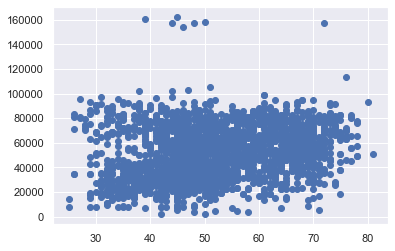

In [194]:
plt.scatter(x=data1['Age'],y=data1['Income'])

### c. Total_child & Total_Spending 

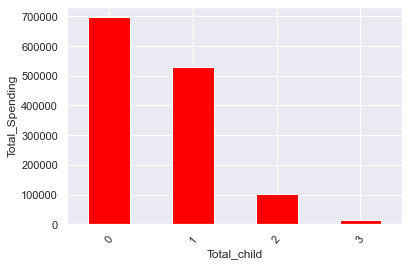

In [85]:
#high total spending if no child at home
fig=plt.figure()
ax = data1.groupby('Total_child', as_index=True).Total_Spending.sum().plot(kind='bar',color='Red')
ax.set_ylabel('Total_Spending')
ax.set_xlabel('Total_child')
plt.xticks(rotation=50)
plt.show()

### d. Total_child & Age_groups 

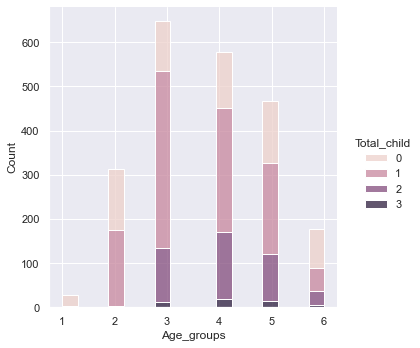

In [86]:
#no of child of different age group have
sns.displot(data1, x="Age_groups", hue="Total_child", multiple="stack")
plt.show()

### e. Total_Spending & Age_groups 

In [87]:
data1.groupby('Age_groups', as_index=False).Total_Spending.sum()

Age_groups  Total_Spending
0           1           23184
1           2          179241
2           3          324660
3           4          352841
4           5          324517
5           6          138834

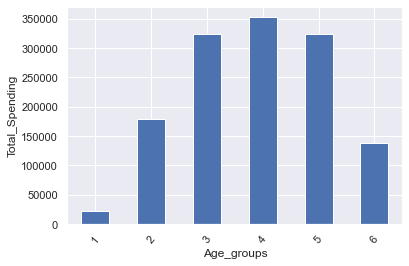

In [88]:
fig=plt.figure()
ax = data1.groupby('Age_groups', as_index=True).Total_Spending.sum().plot(kind='bar')
ax.set_ylabel('Total_Spending')
plt.xticks(rotation=50)
plt.show()

### f. Total_Spending & Income 

Text(0.5, 1.0, 'Spending vs Income')

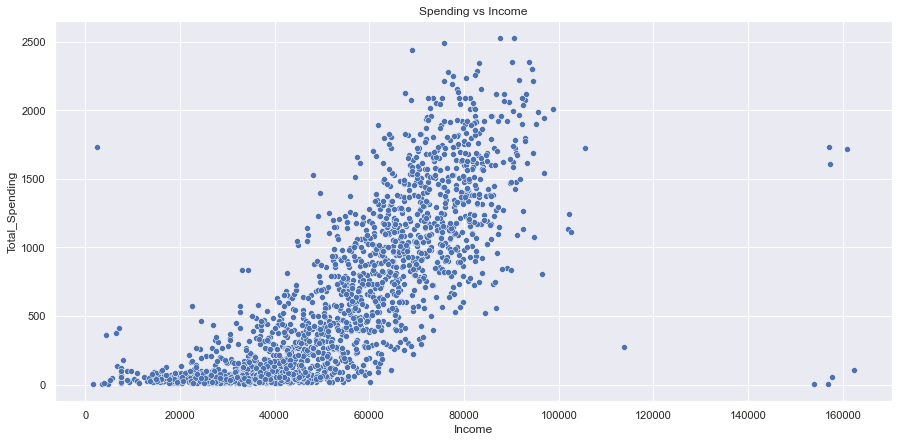

In [89]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=data1, y='Total_Spending', x='Income')
plt.title('Spending vs Income')

### f. Total_Spending & Amount spent on each products

<AxesSubplot:>

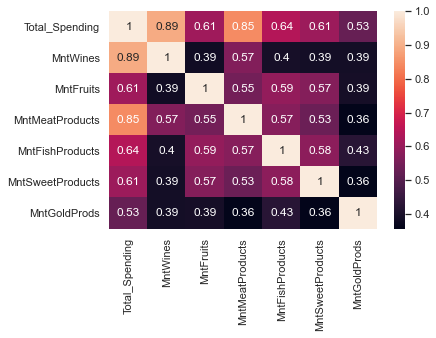

In [90]:
#highly correlated with spending on wine and meat
corr = data1[['Total_Spending', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()
sns.heatmap(corr, annot=True)

### g. Campaign analysis ( 0 - rejected & 1 - accepted )

Text(0.5, 1.0, 'Campaign Analysis')

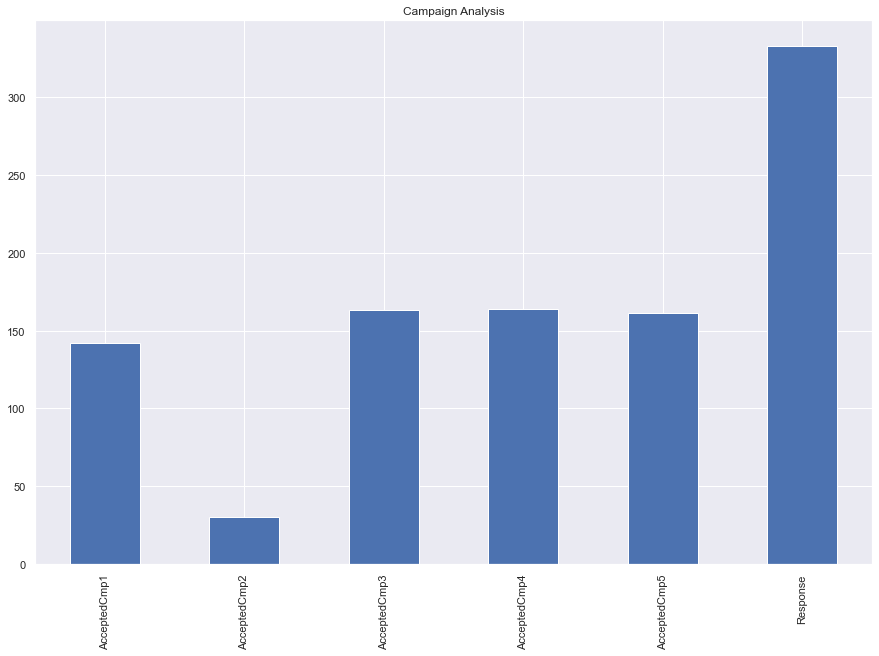

In [91]:
#AcceptedCmp2 is the worse campaign
campaign = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

campaign.plot(kind='bar', figsize=(15,10))
plt.title('Campaign Analysis')

# Set Tartget Variable

In [92]:
# Target Variable
# y= target variable 
#Target Variable is Response, becasue we are predicting Response.

y = data1['Response']
y

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2212, dtype: int64

# Set Predictor Variables based on correlation

y = income_model[['Income']]

X = income_model.drop(columns = 'Income')

In [93]:
# highest correlation with the quality 
feat = [x for x in data1.columns if x != 'Response']
x = data1[feat]
x

Education  Marital_Status   Income  Recency  MntWines  MntFruits  \
0             2               1  58138.0       58       635         88   
1             2               1  46344.0       38        11          1   
2             2               2  71613.0       26       426         49   
3             2               2  26646.0       26        11          4   
4             5               3  58293.0       94       173         43   
...         ...             ...      ...      ...       ...        ...   
2235          2               3  61223.0       46       709         43   
2236          5               2  64014.0       56       406          0   
2237          2               4  56981.0       91       908         48   
2238          3               2  69245.0        8       428         30   
2239          5               3  52869.0       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1             6  ...   
2                 127              111                21            42  ...   
3                  20               10                 3             5  ...   
4                 118               46                27            15  ...   
...               ...              ...               ...           ...  ...   
2235              182               42               118           247  ...   
2236               30                0                 0             8  ...   
2237              217               32                12            24  ...   
2238              214               80                30            61  ...   
2239               61                2                 1            21  ...   

      AcceptedCmp1  AcceptedCmp2  Complain  Age  Total_child  \
0                0             0         0   64            0   
1                0             0         0   67            2   
2                0             0         0   56            0   
3                0             0         0   37            1   
4                0             0         0   40            1   
...            ...           ...       ...  ...          ...   
2235             0             0         0   54            1   
2236             1             0         0   75            3   
2237             0             0         0   40            0   
2238             0             0         0   65            1   
2239             0             0         0   67            2   

      Years_Enroll_with_Company  Total_Spending  Total_no_of_purchases  \
0                             9            1617                     22   
1                             7              27                      4   
2                             8             776                     20   
3                             7              53                      6   
4                             7             422                     14   
...                         ...             ...                    ...   
2235                          8            1341                     16   
2236                          7             444                     15   
2237                          7            1241                     18   
2238                          7             843                     21   
2239                          9             172                      8   

      Age_groups  Income_groups  
0              5              3  
1              5              2  
2              4              4  
3              2              1  
4              3              3  
...          ...            ...  
2235           4              3  
2236           6              3  
2237           3              3  
2238           5              4  
2239           5              3  

[2212 rows x 28 columns]

In [94]:
data1.shape

(2212, 29)

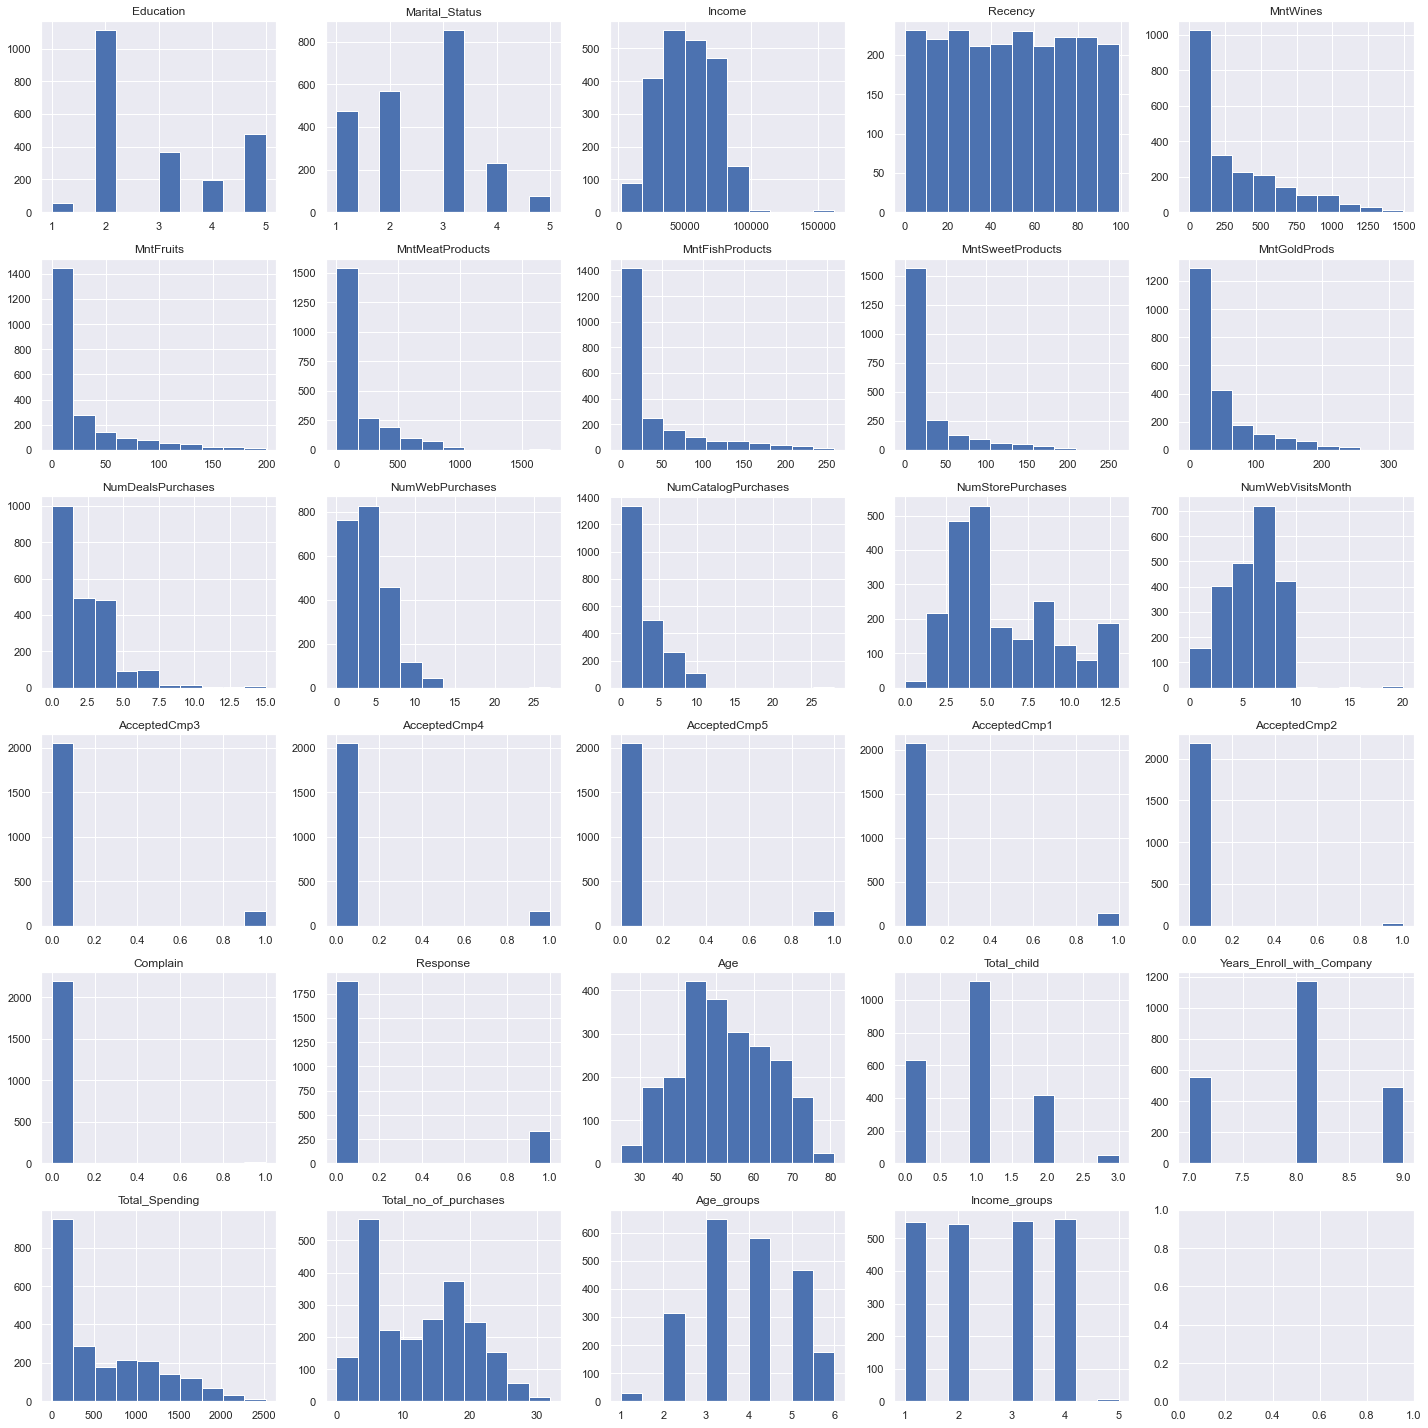

In [95]:
plt.subplots(6,5, figsize=(20,20))  
num=1
for col in data1.columns:
    plt.subplot(6,5,num)
    plt.hist(x=data1[col],bins=10)
    plt.title(f'{col}')
    num+=1
    
plt.tight_layout()

## K-mean

In [96]:
from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()
num_df = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [97]:
final_df = pd.concat([x, y], axis=1)
final_df.sample(2)

Education  Marital_Status   Income  Recency  MntWines  MntFruits  \
1696          4               2  42033.0       95        11          1   
1163          2               2  80685.0       55       241         45   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1696                4                2                 0             7  ...   
1163              604               34                26            54  ...   

      AcceptedCmp2  Complain  Age  Total_child  Years_Enroll_with_Company  \
1696             0         0   50            2                          9   
1163             0         0   27            0                          9   

      Total_Spending  Total_no_of_purchases  Age_groups  Income_groups  \
1696              25                      3           4              2   
1163            1004                     20           1              4   

      Response  
1696         0  
1163         0  

[2 rows x 29 columns]

In [98]:
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.decomposition import PCA


for clusters in range(2, 9):    # We will run loop and creating clusters from 2- 8
    km = KMeans(n_clusters=clusters, random_state=0)
    y_km = km.fit_predict(final_df)

    #To Visualize how our customer form cluster, We need to reduce dimentionality to 2, We will use PCA for that.
    pca = PCA(  n_components= 2)
    pca_df =pd.DataFrame(pca.fit_transform(final_df), columns= [str(i) for i in range(2)])
    pca_df['Predict'] = y_km

    fig = px.scatter(pca_df, x ='0', y = '1', color='Predict', labels={'0': f'X-Dimention- with {clusters} cluster', '1':'Y-Dimention'})
    fig.update_layout(height = 500, width = 450)
    fig.show()

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [100]:
logreg = LogisticRegression()

In [101]:
logreg.fit(x,y)

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [102]:
logreg.coef_

array([[ 4.36843678e-04, -1.19959708e-03, -1.83622309e-05,
        -2.65008598e-02,  9.29248023e-04, -2.53140866e-03,
         1.50691495e-03, -2.21789851e-03,  7.75529184e-04,
         2.46062182e-03, -2.44340236e-04,  1.12599081e-03,
         2.08327638e-03, -6.50653890e-03,  4.56692364e-04,
         9.78131230e-04,  5.23708246e-04,  8.55655455e-04,
         8.25887263e-04,  2.51520438e-04,  1.46170255e-05,
        -1.59216557e-02, -7.49901715e-04, -1.46861293e-03,
         9.23006805e-04, -3.29727172e-03, -1.26291282e-03,
        -4.22966904e-04]])

In [103]:
logreg.intercept_

array([-0.00035792])

In [104]:
#R-score
logreg.score(x,y)

0.8539783001808319

In [105]:
logreg.fit(X_train, y_train)

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [106]:
logreg.fit(X_test, y_test)

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [107]:
logreg.score(X_train, y_train)

0.8541548897682306

In [108]:
logreg.score(X_test, y_test)

0.8487584650112867

### Adjusted $R^2$ formula
$$Adjusted \; R^2 = 1 - { (1 - R^2) (n - 1)  \over n - k - 1 }$$
### Use Forward Feature Selection to pick a good model

In [109]:
## Flag intermediate output
show_steps = True   # for testing/debugging

In [110]:
data1.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_child',
       'Years_Enroll_with_Company', 'Total_Spending', 'Total_no_of_purchases',
       'Age_groups', 'Income_groups'],
      dtype='object')

In [111]:
# Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'scoring': 0}
# create a model object to hold the modelling parameters
model = LogisticRegression() # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(x.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        scoring = model.score(X_test[included + [new_column]],y_test) # calculate the score
        
        
        if show_steps:
            print('(Step) - scoring: This = %.3f; Best = %.3f' % 
                  (scoring, best['scoring']))

        # if model improves
        if scoring > best['scoring']:
            # record new parameters
            best = {'feature': new_column, 'scoring': scoring }
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; scoring = %.3f' % 
                      (best['feature'], best['scoring']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with scoring = %.3f' % 
              (best['feature'], best['scoring']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = Age, Income, MntGoldProds, Age_groups, Recency, MntFishProducts, Income_groups, Education, Years_Enroll_with_Company, MntSweetProducts, AcceptedCmp5, Total_Spending, Complain, MntWines, Marital_Status, AcceptedCmp3, NumDealsPurchases, Total_child, AcceptedCmp4, Total_no_of_purchases, NumWebPurchases, AcceptedCmp1, MntFruits, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, MntMeatProducts, AcceptedCmp2
(Step) Trying Age...
(Step) - Features = Age
(Step) - scoring: This = 0.826; Best = 0.000
(Step) - New Best!   : Feature = Age; scoring = 0.826
(Step) Trying Income...
(Step) - Features = Income
(Step) - scoring: This = 0.826; Best = 0.826
(Step) Trying MntGoldProds...
(Step) - Features = MntGoldProds
(Step) - scoring: This = 0.826; Best = 0.826
(Step) Trying Age_groups...
(Step) - Features = Age_groups
(Step) - scoring: This = 0.826; Best = 0.826
(Step) Trying Recency...
(Step) - Features = Recency
(Step) - scoring: This = 0.826; Best = 0.826
(Step) Trying M

(Step) - scoring: This = 0.856; Best = 0.869
(Step) Trying Complain...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Complain
(Step) - scoring: This = 0.856; Best = 0.869
(Step) Trying MntWines...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, MntWines
(Step) - scoring: This = 0.853; Best = 0.869
(Step) Trying Marital_Status...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Marital_Status
(Step) - scoring: This = 0.856; Best = 0.869
(Step) Trying AcceptedCmp3...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, AcceptedCmp3
(Step) - scoring: This = 0.862; Best = 0.869
(Step) Trying NumDealsPurchases...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, NumDealsPurchases
(Step) - scoring: This = 0.853; Best = 0.869
(Step) Trying Total_child...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Total_child
(Step) - scoring: This = 0.856; Best = 0.869
(Step) Trying AcceptedCmp4...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, AcceptedCmp4
(Step) - scoring: This = 0.853; Best = 0.869
(Step) 

(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, MntWines
(Step) - scoring: This = 0.874; Best = 0.878
(Step) Trying Marital_Status...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Marital_Status
(Step) - scoring: This = 0.876; Best = 0.878
(Step) Trying NumDealsPurchases...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, NumDealsPurchases
(Step) - scoring: This = 0.871; Best = 0.878
(Step) Trying Total_child...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child
(Step) - scoring: This = 0.883; Best = 0.878
(Step) - New Best!   : Feature = Total_child; scoring = 0.883
(Step) Trying AcceptedCmp4...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, AcceptedCmp4
(Step) - scoring: This = 0.874; Best = 0.883
(Step) Trying Total_no_of_purchases...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_no_of_purchases
(Step) - scoring: This = 0.876; B

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



(Step) - scoring: This = 0.878; Best = 0.885
(Step) Trying NumWebPurchases...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, NumWebPurchases
(Step) - scoring: This = 0.869; Best = 0.885
(Step) Trying MntFruits...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, MntFruits
(Step) - scoring: This = 0.883; Best = 0.885
(Step) Trying NumCatalogPurchases...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, NumCatalogPurchases
(Step) - scoring: This = 0.878; Best = 0.885
(Step) Trying NumStorePurchases...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, NumStorePurchases
(Step) - scoring: This = 0.878; Best = 0.885
(Step) Trying NumWebVisitsMonth...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, NumWebVisitsMonth
(Step) - scoring: This = 0.876; Best = 0.885
(Step) Trying MntMeatProducts...
(Step) - Features = Accepted

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/anna_hj

(Step) - scoring: This = 0.883; Best = 0.885
(Step) Trying Age_groups...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, Marital_Status, Age_groups
(Step) - scoring: This = 0.876; Best = 0.885
(Step) Trying MntFishProducts...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, Marital_Status, MntFishProducts
(Step) - scoring: This = 0.885; Best = 0.885
(Step) Trying Income_groups...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, Marital_Status, Income_groups
(Step) - scoring: This = 0.883; Best = 0.885
(Step) Trying Education...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, Marital_Status, Education
(Step) - scoring: This = 0.885; Best = 0.885
(Step) Trying Years_Enroll_with_Company...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, Marital_Status, Years_Enroll_with_Company
(Step) - scoring: This = 0.880; Best

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



(Step) - scoring: This = 0.885; Best = 0.885
(Step) Trying MntWines...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, Marital_Status, MntWines
(Step) - scoring: This = 0.876; Best = 0.885
(Step) Trying NumDealsPurchases...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, Marital_Status, NumDealsPurchases
(Step) - scoring: This = 0.876; Best = 0.885
(Step) Trying AcceptedCmp4...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, Marital_Status, AcceptedCmp4
(Step) - scoring: This = 0.880; Best = 0.885
(Step) Trying Total_no_of_purchases...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, Marital_Status, Total_no_of_purchases
(Step) - scoring: This = 0.883; Best = 0.885
(Step) Trying NumWebPurchases...
(Step) - Features = AcceptedCmp5, AcceptedCmp1, Recency, AcceptedCmp3, Total_child, Marital_Status, NumWebPurchases
(Step) - scoring: This = 0.871; Be

In [112]:
#from sklearn.model_selection import cross_val_score
#Cross-Validation
cross_val_score(model, x, y)

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/anna_hj

array([0.84650113, 0.85778781, 0.83257919, 0.86199095, 0.86425339])

## 1. Logistic Regression Model

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [113]:
y = data1['Response']
x = data1[feat]

In [114]:
print(feat)

['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Age', 'Total_child', 'Years_Enroll_with_Company', 'Total_Spending', 'Total_no_of_purchases', 'Age_groups', 'Income_groups']


In [115]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [116]:
logreg = LogisticRegression()

In [117]:
logreg.fit(X_train,y_train)

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [118]:
logreg.fit(X_train, y_train)

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [119]:
logreg.coef_

array([[ 1.16432058e-04, -1.22745858e-03, -2.21580870e-05,
        -3.09712506e-02,  1.37556129e-03, -2.68150139e-03,
         2.54101090e-03, -4.31017089e-03,  1.41733140e-03,
         2.19437252e-03,  2.84832823e-04,  6.60631747e-04,
         1.82112714e-03, -3.51209157e-03,  1.09669410e-04,
         6.70453458e-04,  2.72898247e-04,  3.85287274e-04,
         5.35009030e-04,  1.60073546e-04,  4.64079304e-06,
        -1.03012221e-02, -4.74553499e-04, -9.71850119e-04,
         5.36603837e-04, -1.03033268e-03, -8.65594154e-04,
        -2.69419687e-04]])

In [120]:
logreg.intercept_

array([-0.00023438])

In [121]:
logreg.score(X_train,y_train)

0.8553345388788427

In [122]:
logreg.score(X_test,y_test)

0.8426763110307414

In [123]:
from sklearn import metrics
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[453  14]
 [ 73  13]]


In [124]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


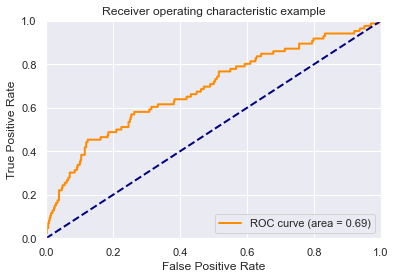

In [125]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [126]:
y1 = data1['Response']
x1 = data1[['Recency']]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, random_state = 1)

In [128]:
logreg = LogisticRegression()

In [129]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [130]:
logreg.score(X_train,y_train)

0.8511151295961422

In [131]:
logreg.score(X_test,y_test)

0.8444846292947559

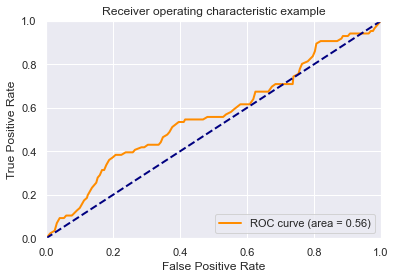

In [132]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# 2. Decision Tree

In [133]:
# Split your data
x = data1[feat]
y = data1['Response']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [135]:
# Define ML model(s)
tree = DecisionTreeClassifier(max_depth=10,random_state=42)

In [136]:
# Fit model
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [137]:
tree.score(X_test,y_test)

0.8390596745027125

In [138]:
# Evaluate model against training set
tree.score(X_train,y_train)

0.9746835443037974

In [139]:
tree.feature_importances_

array([0.01968788, 0.03651079, 0.05569323, 0.12571938, 0.02107452,
       0.02815894, 0.07332694, 0.01730908, 0.04996158, 0.05855773,
       0.02659028, 0.03262423, 0.03505849, 0.04312623, 0.02261989,
       0.0557652 , 0.00384069, 0.12379268, 0.01155232, 0.01473517,
       0.00517215, 0.01879487, 0.        , 0.04941066, 0.01881283,
       0.02466518, 0.02398244, 0.00345662])

In [140]:
params = {
    "max_depth":range(1,50),
    "criterion": ["gini","entropy"],
    "class_weight": [None,'balanced']
}

In [141]:
gs_tree = DecisionTreeClassifier()

In [142]:
gs = GridSearchCV(estimator=tree,
                 param_grid=params)

In [143]:
gs.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 50)})

In [144]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=42)

In [145]:
gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 50)})

In [146]:
#Make Predictions and Evaluate the Test Model
#NOTE: Do this only after not making any more improvements in the model.
#Use the test data to make predictions
#For Supervised models:
#Check the Test Results with the Test Predictions
best_tree = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10)

In [147]:
best_tree = DecisionTreeClassifier(max_depth=3)

In [148]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [149]:
best_tree.score(X_test, y_test)

0.8625678119349005

In [150]:
y_pred = best_tree.predict(X_test)

In [151]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))

Accuracy: 0.8625678119349005
Precision: 0.7
Recall: 0.30434782608695654


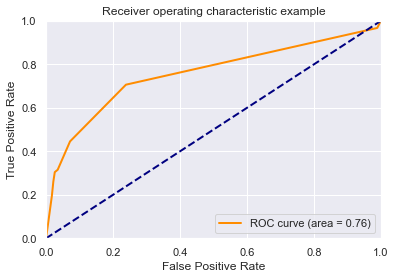

In [152]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = best_tree.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [153]:
#Feature Importance
best_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.18743634, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.20127575, 0.        , 0.44681025, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.16447766, 0.        ,
       0.        , 0.        , 0.        ])

In [154]:
for name,score in zip(x.columns,best_tree.feature_importances_):
    print(f'{name}:{score}')

Education:0.0
Marital_Status:0.0
Income:0.0
Recency:0.1874363375346795
MntWines:0.0
MntFruits:0.0
MntMeatProducts:0.0
MntFishProducts:0.0
MntSweetProducts:0.0
MntGoldProds:0.0
NumDealsPurchases:0.0
NumWebPurchases:0.0
NumCatalogPurchases:0.0
NumStorePurchases:0.0
NumWebVisitsMonth:0.0
AcceptedCmp3:0.20127575233363576
AcceptedCmp4:0.0
AcceptedCmp5:0.446810250770931
AcceptedCmp1:0.0
AcceptedCmp2:0.0
Complain:0.0
Age:0.0
Total_child:0.0
Years_Enroll_with_Company:0.16447765936075362
Total_Spending:0.0
Total_no_of_purchases:0.0
Age_groups:0.0
Income_groups:0.0


Text(0.5, 0, 'Relative Importance')

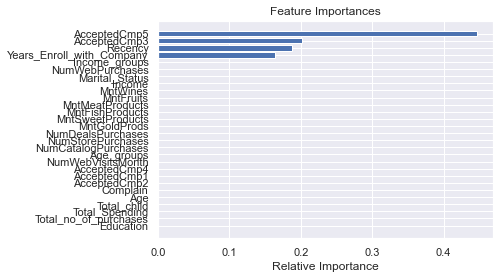

In [155]:
features=x[feat].columns
importances = best_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),features[indices])
plt.xlabel('Relative Importance')

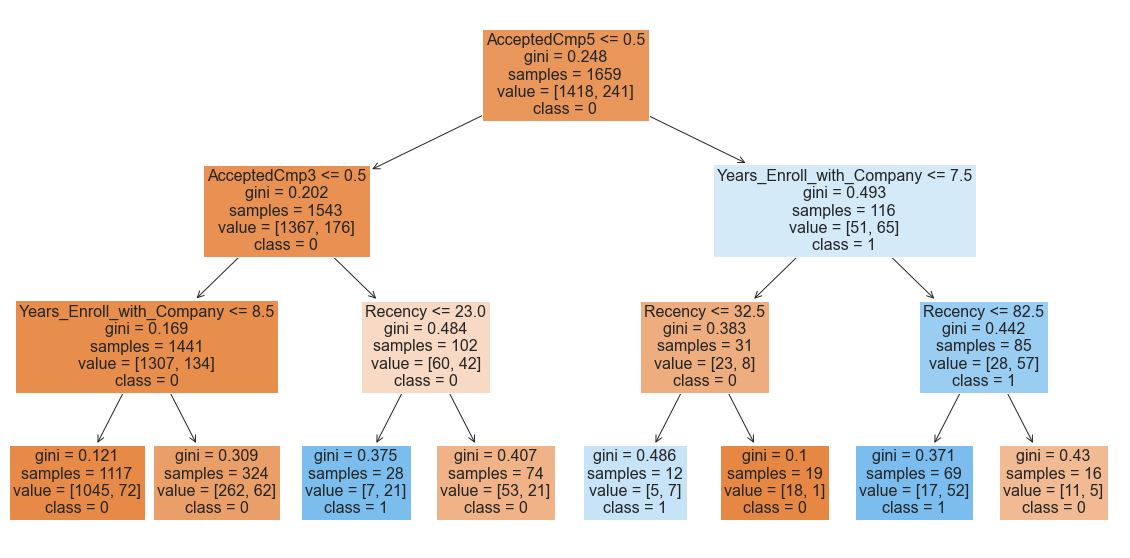

In [156]:
from sklearn import tree
plt.figure(figsize = (20,10))
tree.plot_tree(best_tree, 
               feature_names=x[feat].columns,
               class_names=['0','1'],
               filled = True,
              fontsize=16);

# 3. Random Forests

In [157]:
tree = DecisionTreeClassifier(max_depth=10,random_state=42)

In [158]:
# Split your data
x = data1[feat]
y = data1['Response']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [160]:
# Define ML model(s)
rfor = RandomForestClassifier(max_depth=10, random_state=42)

In [161]:
rfor.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [162]:
# Evaluate model against training set
rfor.score(X_train,y_train)

0.9620253164556962

In [163]:
rfor.score(X_test,y_test)

0.864376130198915

In [164]:
x.head(1)

Education  Marital_Status   Income  Recency  MntWines  MntFruits  \
0          2               1  58138.0       58       635         88   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   

   AcceptedCmp1  AcceptedCmp2  Complain  Age  Total_child  \
0             0             0         0   64            0   

   Years_Enroll_with_Company  Total_Spending  Total_no_of_purchases  \
0                          9            1617                     22   

   Age_groups  Income_groups  
0           5              3  

[1 rows x 28 columns]

In [165]:
#Finding the best parameters
random_forest = RandomForestClassifier()

In [166]:
params = {
    'n_estimators': [100,110,120,130,140,150],
    'criterion':['gini','entropy'],
    'max_depth': range(3,5),
    'class_weight':['balanced','balanced_subsample',None]
}

In [167]:
gs = GridSearchCV(random_forest, param_grid=params,scoring='f1')

In [168]:
gs.fit(x,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 5),
                         'n_estimators': [100, 110, 120, 130, 140, 150]},
             scoring='f1')

In [169]:
gs.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4)

In [170]:
#from sklearn import metrics
best_for = gs.best_estimator_

In [171]:
gs.best_estimator_.feature_importances_

array([0.0061432 , 0.01407794, 0.05175856, 0.11471364, 0.05966072,
       0.00810575, 0.06554796, 0.00700621, 0.01955761, 0.05045611,
       0.00271738, 0.0294746 , 0.05223673, 0.03129782, 0.03185325,
       0.08261416, 0.00818384, 0.08445226, 0.05462614, 0.00437696,
       0.        , 0.01254508, 0.01766689, 0.05251884, 0.10870711,
       0.0143527 , 0.00372685, 0.0116217 ])

In [172]:
x.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Age', 'Total_child',
       'Years_Enroll_with_Company', 'Total_Spending', 'Total_no_of_purchases',
       'Age_groups', 'Income_groups'],
      dtype='object')

In [173]:
for name, score in zip(x.columns,rfor.feature_importances_):
    print(f'Score of {name}:{score}')

Score of Education:0.019925952396715053
Score of Marital_Status:0.03259228207051609
Score of Income:0.06261518241143303
Score of Recency:0.08410361724865681
Score of MntWines:0.059550314431718376
Score of MntFruits:0.03076260394146454
Score of MntMeatProducts:0.06734015220715434
Score of MntFishProducts:0.033937992210730815
Score of MntSweetProducts:0.03843425452891763
Score of MntGoldProds:0.04537118176327499
Score of NumDealsPurchases:0.028183459711912245
Score of NumWebPurchases:0.028959382654741836
Score of NumCatalogPurchases:0.03363822370013497
Score of NumStorePurchases:0.03732472531392941
Score of NumWebVisitsMonth:0.04047577435019221
Score of AcceptedCmp3:0.04335684270890042
Score of AcceptedCmp4:0.008657335430374094
Score of AcceptedCmp5:0.050996711102176046
Score of AcceptedCmp1:0.03600192705614955
Score of AcceptedCmp2:0.007126280020488755
Score of Complain:0.0015016645141458429
Score of Age:0.040495376455138385
Score of Total_child:0.012538231446740869
Score of Years_Enrol

Text(0.5, 0, 'Relative Importance')

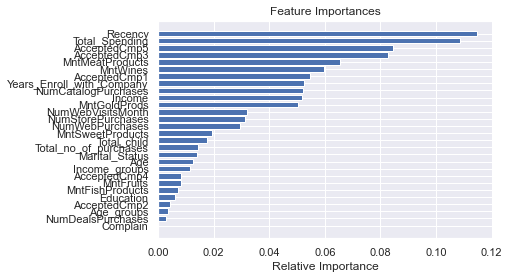

In [174]:
features=x[feat].columns
importances = best_for.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),features[indices])
plt.xlabel('Relative Importance')

In [175]:
y_pred = best_for.predict(X_test)

In [176]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [177]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))

Accuracy: 0.8318264014466547
Precision: 0.496551724137931
Recall: 0.782608695652174


In [178]:
cf_matrix = metrics.confusion_matrix(y_test,y_pred)

<AxesSubplot:>

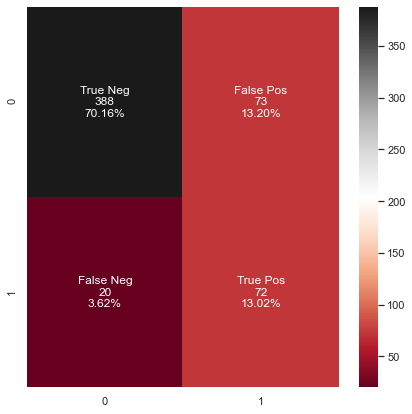

In [179]:
plt.figure(figsize = (7,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}'for v1, v2,v3 in zip (group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix,annot=labels,fmt='',cmap='RdGy')

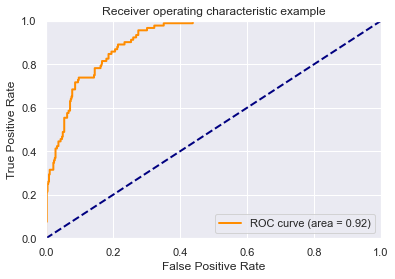

In [180]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = best_for.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# 4. Naive Bayes
## Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [181]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [182]:
gnb.fit(X_train, y_train)

GaussianNB()

In [183]:
y_pred = gnb.predict(X_test)

In [184]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7540687160940326


In [185]:
prediction = gnb.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

# 5. Support Vector Machine

## Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [186]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [187]:
clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(X_train, y_train)

SVC(C=1000)

In [188]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [189]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8444846292947559


In [190]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.0


/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [191]:
clf = svm.SVC(kernel='rbf', C=1000, probability=True)
clf.fit(X_test, y_test.values.ravel())

SVC(C=1000, probability=True)